# Import libraries and info needed to run

In [79]:
import os
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u

# Getting MPL8 and drpall

In [80]:
# Ruinning this gives me a KeyError, MANGADIR_MPL8 maybe isn't in my system's dictionary? As a result, I don't think 
# subsequent cells will run.
mpl8_dir = 'local/'#os.environ['MANGADIR_MPL8']
drp = fits.open(mpl8_dir + 'drpall-v2_5_3.fits')
drpdata = drp[1].data 

In [81]:
ba = drpdata.field('nsa_sersic_ba')
stellar_mass = drpdata.field('nsa_sersic_mass')
absmag = drpdata.field('nsa_elpetro_absmag')
gr= absmag[:,3] - absmag[:,4]
filename = 'histograms.pdf'
plateifu = drpdata.field('plateifu')

# Getting information from the MPA-JHU catalog

In [82]:
gal = fits.open(mpl8_dir + 'gal_info_dr7_v5_2.fit')
galdata = gal[1].data
sfr = fits.open(mpl8_dir + 'gal_totsfr_dr7_v5_2.fits')
sfrdata = sfr[1].data
mass = fits.open(mpl8_dir + 'gal_totsfr_dr7_v5_2.fits')
massdata = mass[1].data

# Read in information from NSA catalog

In [83]:
nsa = fits.open(mpl8_dir + '1-nsa_v1_0_1.fits')
nsa_data = nsa[1].data

# Check on a galaxy of interest (note: this part is potentially not needed for making the plots?)

In [84]:
plate = 7977
galaxy = 12704
match = np.where((drpdata.field('plate') == plate) & (drpdata.field('ifudsgn') == str(galaxy)))
mangaid = drpdata[match].field('mangaid')[0]
nsaid = drpdata[match].field('nsa_nsaid')[0]

yo = np.where(nsa_data.field('NSAID') == nsaid)
name = nsa_data[yo[0][0]].field('IAUNAME')
print(name)
what = drpdata[match].field('nsa_iauname')[0]
print(what)

J220943.19+133802.9
J220943.19+133802.9


# Match the NSA and MaNGA catalogs for right ascension and declination (this is the part mentioned for me to change)

In [85]:
manga_ra = drpdata.field('objra')
manga_dec = drpdata.field('objdec')
nsa_ra = nsa_data.field('RA')
nsa_dec = nsa_data.field('DEC')
c = SkyCoord(ra=manga_ra*u.degree, dec=manga_dec*u.degree)
catalog = SkyCoord(ra=nsa_ra*u.degree, dec=nsa_dec*u.degree)
idx, d2d, d3d = c.match_to_catalog_sky(catalog) 

# Match the MPA-JHU and MaNGA catalogs on the basis of RA and DEC (actually maybe this was the part, i.e. the RA and DEC?)

In [86]:
mpa_ra = galdata.field('RA')
mpa_dec = galdata.field('DEC')
bad = mpa_dec < -90
mpa_dec[bad] = -90
mpa_cat = SkyCoord(ra=mpa_ra*u.degree, dec=mpa_dec*u.degree)
idx_mpa, d2d_mpa, d3d_mpa = c.match_to_catalog_sky(mpa_cat)  

# define theta 50, theta 90, (RA and DEC related?) and concentration arrays

In [87]:
th50 = nsa_data.field('ELPETRO_TH50_R')
th90 = nsa_data.field('ELPETRO_TH90_R')

th50_manga = th50[idx]
th90_manga = th90[idx]
c_manga = th90_manga / th50_manga

sfr_manga = sfrdata.field('MEDIAN')[idx_mpa]
mass_manga = massdata.field('MEDIAN')[idx_mpa]

# Get just the MaNGA galaxies

In [88]:
blah = drpdata.field('srvymode') == 'MaNGA dither'
print(len(c_manga[blah]))

6661


# Update the concentration and ba arrays (I'm not sure what this really does)

In [89]:
c_manga_gal = c_manga[blah]
ba_gal = ba[blah]
stellar_mass_gal = stellar_mass[blah]
gr_gal = gr[blah]
sfr_manga_gal = sfr_manga[blah]
mass_manga_gal = mass_manga[blah]

In [90]:
# find late-type manga galaxies

In [91]:
late = c_manga_gal < 2.6

In [92]:
# update concentration and ba arrays

In [93]:
ba_gal_late = ba_gal[late]
c_manga_gal_late = c_manga_gal[late]
stellar_mass_gal_late = stellar_mass_gal[late]
gr_gal_late = gr_gal[late]
sfr_manga_gal_late = sfr_manga_gal[late]
mass_manga_gal_late = mass_manga_gal[late]

In [94]:
# find edge-one late-type galaxies

In [95]:
edge = ba_gal_late < 0.3

In [96]:
# update concentration and ba arrays

In [97]:
c_manga_gal_late_edge = c_manga_gal_late[edge]
ba_gal_late_edge = ba_gal_late[edge]
stellar_mass_gal_late_edge = stellar_mass_gal_late[edge]
gr_gal_late_edge = gr_gal_late[edge]
sfr_manga_gal_late_edge = sfr_manga_gal_late[edge]
mass_manga_gal_late_edge = mass_manga_gal_late[edge]

print(len(c_manga_gal_late_edge))
print(len(ba_gal_late_edge))
print(np.sort(plateifu[blah][late][edge]))

647
647
['10001-12703' '10001-12704' '10213-12703' '10214-12701' '10214-3701'
 '10215-9101' '10215-9102' '10216-6104' '10217-12702' '10217-12703'
 '10219-12705' '10219-6103' '10220-12701' '10220-12702' '10220-6104'
 '10221-3701' '10493-12702' '10493-12704' '10496-12701' '10496-12703'
 '10496-6101' '10497-3704' '10498-12701' '10499-9102' '10503-12702'
 '10503-12703' '10503-12704' '10503-3703' '10503-6102' '10506-12704'
 '10507-12704' '10507-1902' '10507-3702' '10508-12704' '10510-1902'
 '10510-9101' '10511-12701' '10511-6101' '10512-9102' '10514-12705'
 '10514-3701' '10517-12701' '10517-12702' '10517-12703' '10519-12702'
 '10519-6101' '7443-12704' '7444-12702' '7444-12705' '7444-3704'
 '7444-6101' '7444-6103' '7444-704' '7444-708' '7495-12702' '7495-3702'
 '7495-3703' '7495-6104' '7815-6101' '7957-6102' '7958-12702' '7958-12703'
 '7958-12704' '7960-12702' '7960-6103' '7962-12705' '7964-12704'
 '7964-12705' '7972-3701' '7975-12703' '7975-3701' '7975-9102'
 '7977-12704' '7979-12701' '7979

# Making the Plots (maybe separate each plot for my own clarity?)

/Users/rileytheriault/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log10
/Users/rileytheriault/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log10
/Users/rileytheriault/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in log10
/Users/rileytheriault/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in log10
/Users/rileytheriault/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in log10
/Users/rileytheriault/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in log10


0

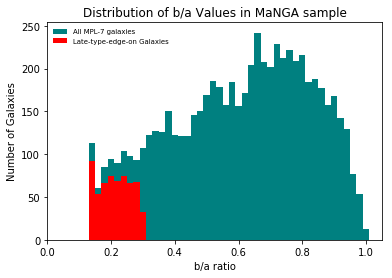

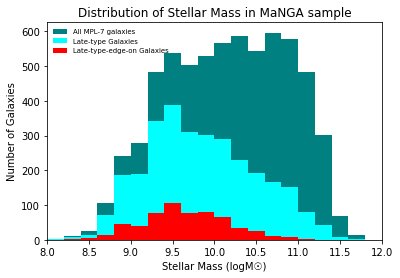

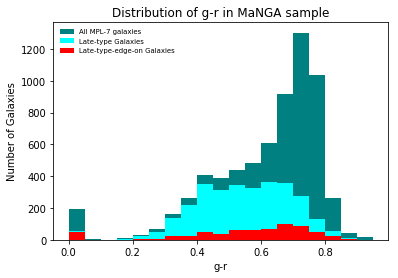

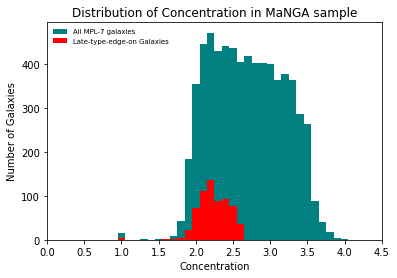

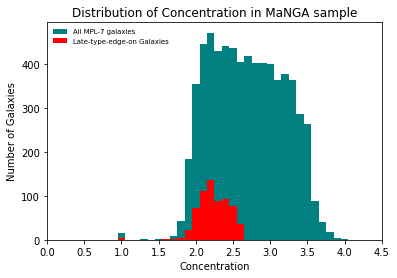

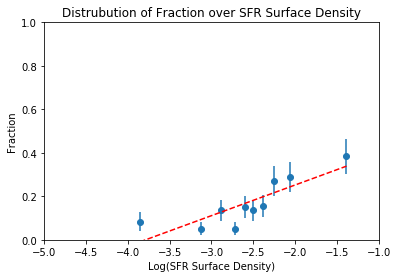

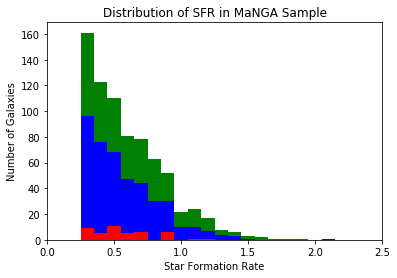

In [150]:
fraction = np.array([5/60, 3/59, 8/59, 3/59, 9/59, 8/59, 9/58, 16/59, 17/59, 23/60])
unc = np.array([np.sqrt(7)/60, np.sqrt(3)/59, np.sqrt(8)/59, np.sqrt(3)/59, np.sqrt(9)/59, np.sqrt(8)/59, np.sqrt(9)/58,
                    np.sqrt(16)/59, np.sqrt(17)/59, np.sqrt(23)/60])
sigma_sfr_p = np.log10(np.array([1.4e-4,7.6e-4,0.0013,0.0019,0.0025,0.0031,0.0041,0.0056,0.0087,0.041])) #0.034

# removing np.array()

with PdfPages(filename) as pdf:

#plot 1: b/a ratio
    fig = plt.figure()
    plt.xlim(xmin=0.0, xmax = 1.05)
    plt.hist(ba_gal, color='teal', bins=np.arange(0.05,1.02,.02), label= 'All MPL-7 galaxies')
    plt.hist(ba_gal_late_edge, color='red', bins=np.arange(0.05,1.02,.02), label= 'Late-type-edge-on Galaxies') 
    plt.xlabel('b/a ratio')
    plt.ylabel('Number of Galaxies')
    plt.title('Distribution of b/a Values in MaNGA sample')
    plt.legend(loc='upper left', frameon=False, fontsize='x-small')

    pdf.savefig()
    plt.close

    log_stellar_mass_gal = np.log10(stellar_mass_gal)
    use = np.isfinite(log_stellar_mass_gal)

    log_stellar_mass_gal_late_edge = np.log10(stellar_mass_gal_late_edge)
    yo = np.isfinite(log_stellar_mass_gal_late_edge)

    log_stellar_mass_gal_late = np.log10(stellar_mass_gal_late)
    mo = np.isfinite(log_stellar_mass_gal_late)
    
    #plot 2: stellar mass
    fig = plt.figure()
    plt.hist(log_stellar_mass_gal[use],color='teal', bins=np.arange(8.0,12.0,.2), label= 'All MPL-7 galaxies')
    plt.hist(log_stellar_mass_gal_late[mo], color='cyan', bins=np.arange(8.0,12.0,.2), label= 'Late-type Galaxies')
    plt.hist(log_stellar_mass_gal_late_edge[yo], color='red', bins=np.arange(8.0,12.0,.2), label= 'Late-type-edge-on Galaxies')
    plt.xlim(8,12)
    plt.xlabel('Stellar Mass (logM☉)')
    plt.ylabel('Number of Galaxies')
    plt.title('Distribution of Stellar Mass in MaNGA sample')
    plt.legend(loc='upper left', frameon=False, fontsize='x-small')

    pdf.savefig()
    plt.close

    #plot 3: g-r
    fig = plt.figure()
    plt.hist(gr_gal, bins=np.arange(0.0,1.0,0.05), color='teal', label= 'All MPL-7 galaxies')
    plt.hist(gr_gal_late, bins=np.arange(0.0,1.0,0.05), color='cyan', label= 'Late-type Galaxies')
    plt.hist(gr_gal_late_edge, bins=np.arange(0.0,1.0,0.05), color='red', label= 'Late-type-edge-on Galaxies')
    plt.xlabel('g-r')
    plt.ylabel('Number of Galaxies')
    plt.title('Distribution of g-r in MaNGA sample')
    plt.legend(loc='upper left', frameon=False, fontsize='x-small')

    pdf.savefig()
    plt.close

    #concentration
    fig = plt.figure()
    plt.xlim(xmin=0, xmax = 4.5)
    plt.hist(c_manga_gal, bins=np.arange(.25,4.1,0.1), color='teal', label= 'All MPL-7 galaxies')
    plt.hist(c_manga_gal_late_edge, bins=np.arange(.25,4.1,0.1), color='red', label= 'Late-type-edge-on Galaxies')
    plt.xlabel('Concentration')
    plt.ylabel('Number of Galaxies')
    plt.title('Distribution of Concentration in MaNGA sample')
    plt.legend(loc='upper left', frameon=False, fontsize='x-small')

    pdf.savefig()
    plt.close

    fig = plt.figure()

    plt.xlim(xmin=0, xmax = 4.5)
    plt.hist(c_manga_gal, bins=np.arange(.25,4.1,0.1), color='teal', label= 'All MPL-7 galaxies')
    plt.hist(c_manga_gal_late_edge, bins=np.arange(.25,4.1,0.1), color='red', label= 'Late-type-edge-on Galaxies')
    plt.xlabel('Concentration')
    plt.ylabel('Number of Galaxies')
    plt.title('Distribution of Concentration in MaNGA sample')
    plt.legend(loc='upper left', frameon=False, fontsize='x-small')
    
    pdf.savefig()
    plt.close

    
    fig = plt.figure()

    #plt.scatter(mass_manga_gal, sfr_manga_gal,s=0.1, color='green', marker='s')
    #plt.scatter(mass_manga_gal_late, sfr_manga_gal_late, s=0.1, color='blue', marker='o')
    #plt.scatter(mass_manga_gal_late_edge, sfr_manga_gal_late_edge, s=0.5, marker='*', color='red')
    plt.scatter(np.log10(stellar_mass_gal), sfr_manga_gal,s=0.1, color='green', marker='s')
    plt.scatter(np.log10(stellar_mass_gal_late), sfr_manga_gal_late, s=0.1, color='blue', marker='o')
    plt.scatter(np.log10(stellar_mass_gal_late_edge), sfr_manga_gal_late_edge, s=0.5, marker='*', color='red')
    plt.xlim(8,12)
    plt.ylim(-2,1.5)
    plt.xlabel('Log(Stellar Mass)')
    plt.ylabel('Log(Star Formation Rate)')
    pdf.savefig()
    plt.close()
   

    fig = plt.figure()
    plt.errorbar(x=sigma_sfr_p, y=fraction, yerr=unc,ls='none')
   
    plt.scatter(sigma_sfr_p, fraction)
    plt.xlabel('Log(SFR Surface Density)')
    plt.ylabel('Fraction')
    plt.title('Distrubution of Fraction over SFR Surface Density')
    plt.xlim(-5,-1)
    plt.ylim(0,1)
    z = np.polyfit(sigma_sfr_p, fraction, 1)
    p = np.poly1d(z)
    plt.plot(sigma_sfr_p,p(sigma_sfr_p),"r--")

    pdf.savefig()
    plt.close
    
    
    fig = plt.figure()

    plt.xlim(xmin=0, xmax = 2.5)
    plt.hist(sfr_manga_gal, bins=np.arange(.25,4.1,0.1), color='green')
    plt.hist(sfr_manga_gal_late, bins=np.arange(.25,4.1,0.1), color='blue')
    plt.hist(sfr_manga_gal_late_edge, bins=np.arange(.25,4.1,0.1), color='red')
    plt.xlabel('Star Formation Rate')
    plt.ylabel('Number of Galaxies')
    plt.title('Distribution of SFR in MaNGA Sample')
    #plt.legend(loc='upper left', frameon=False, fontsize='x-small')
    
    pdf.savefig()
    plt.close
    
    
os.system("open %s &" % filename)

In [121]:
# getting sigma_sfr 

sfr_manga = sfrdata.field('MEDIAN')[idx_mpa]
re_arcsec = drpdata.field('nsa_elpetro_th50_r')#nsa_data.field('ELPETRO_TH50_R')
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)
z = drpdata.field('nsa_z')
re_kpc = re_arcsec * u.arcsec / cosmo.arcsec_per_kpc_proper(z)
sigma_sfr = 10**sfr_manga / (2 * np.pi * re_kpc**2)

print(sigma_sfr)
print(re_kpc)

[0.00936724 0.00145146 0.00743165 ... 0.02340948 0.00030319 0.01142684] 1 / kpc2
[ 4.01112287  5.65680643  5.91935481 ...  4.21399515 10.6887845
  3.49211062] kpc


/Users/rileytheriault/anaconda3/lib/python3.7/site-packages/astropy/cosmology/core.py:1922: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(x) * hyp2f1(1./6, 1./2, 7./6, -x**3)


In [133]:
# getting sigma sfr for different kinds of galaxies

sigma_sfr_gal = sigma_sfr[blah]
sigma_sfr_gal_late = sigma_sfr_gal[late]
sigma_sfr_gal_late_edge = sigma_sfr_gal_late[edge]

Text(0.5, 1.0, 'Distribution of SFR Surface Density in MaNGA Sample')

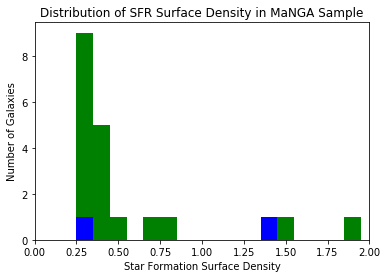

In [134]:
#this feels wrong

fig = plt.figure()

plt.xlim(xmin=0, xmax = 2)
plt.hist(sigma_sfr_gal, bins=np.arange(.25,4.1,0.1), color='green')
plt.hist(sigma_sfr_gal_late, bins=np.arange(.25,4.1,0.1), color='blue')
plt.hist(sigma_sfr_gal_late_edge, bins=np.arange(.25,4.1,0.1), color='red')
plt.xlabel('Star Formation Surface Density')
plt.ylabel('Number of Galaxies')
plt.title('Distribution of SFR Surface Density in MaNGA Sample')
#plt.legend(loc='upper left', frameon=False, fontsize='x-small')
    

In [137]:
ssfr = (sfr_manga/stellar_mass)
print(ssfr)

[-7.71729740e-12 -1.00132679e-10  1.56142710e-11 ...  1.56129609e-11
 -4.84316661e-12 -9.36424961e-11]


In [138]:
ssfr_gal = ssfr[blah]
ssfr_gal_late = ssfr_gal[late]
ssfr_gal_late_edge = ssfr_gal_late[edge]

/Users/rileytheriault/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0
  ret = ax.set_xlim(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of Specific Star Formation in MaNGA Sample')

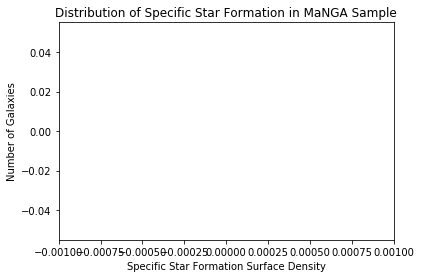

In [140]:
fig = plt.figure()

plt.xlim(xmin=0, xmax = 0)
plt.hist(ssfr_gal, bins=np.arange(.25,4.1,0.1), color='green')
plt.hist(ssfr_gal_late, bins=np.arange(.25,4.1,0.1), color='blue')
plt.hist(ssfr_gal_late_edge, bins=np.arange(.25,4.1,0.1), color='red')
plt.xlabel('Specific Star Formation Surface Density')
plt.ylabel('Number of Galaxies')
plt.title('Distribution of Specific Star Formation in MaNGA Sample')


In [ ]:
fig = plt.figure()
#plt.errorbar(x=sigma_sfr, y=fraction, yerr=unc,ls='none')
   
plt.plot(stellar_mass, sigma_sfr)
plt.xlabel('Stellar Mass')
plt.ylabel('SFR Surface Density')
plt.title('Distrubution of FR Surface Density over Stellar Mass')
#plt.xlim(0, 1)
#plt.ylim(0,1)
    
#pdf.savefig()
plt.close